### Questionnaires (qs.csv) - [One record per questionnaire per question per time point per visit per subject]

This dataset contains info on:
- **EDSS**
- FS scores 
- RAND-36 
- SF-12 
- BDI-II

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'qs.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
qs = pd.read_csv(file_path)

C:\Users\lenne\AppData\Local\Temp\ipykernel_10528\4250792913.py:16: DtypeWarning: Columns (4,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  qs = pd.read_csv(file_path)


Check how many missing values we have per column. 

In [3]:
missing_percentage_qs = (qs.isnull().sum() / len(qs)) * 100
missing_qs = pd.DataFrame({'Column Name': missing_percentage_qs.index, 'Missing Percentage': missing_percentage_qs.values})
missing_qs = missing_qs.sort_values(by='Missing Percentage', ascending=False)
print(missing_qs)

   Column Name  Missing Percentage
29    QSRFTDTC          100.000000
28    QSTPTREF          100.000000
5       QSSPID          100.000000
27      QSELTM          100.000000
26    QSTPTNUM          100.000000
25       QSTPT          100.000000
23       QSDTC          100.000000
11    QSORRESU          100.000000
19      QSEVAL          100.000000
18     QSDRVFL          100.000000
14    QSSTRESU          100.000000
16    QSREASND           99.997550
15      QSSTAT           99.643583
17      QSBLFL           89.925420
22     VISITDY           82.796628
4      QSGRPID           80.735645
30    QSEVLINT           65.621993
9       QSSCAT           59.320312
24        QSDY           24.402110
13    QSSTRESN            0.578733
10     QSORRES            0.476263
12    QSSTRESC            0.356417
1       DOMAIN            0.000000
20    VISITNUM            0.000000
21       VISIT            0.000000
8        QSCAT            0.000000
7       QSTEST            0.000000
6     QSTESTCD      

Remove columns with more than 80% missingness as well as redundant columns.

In [4]:
# Set the threshold for missing percentage
threshold = 80

# Filter columns based on missing percentage
columns_to_drop = missing_qs[missing_qs['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
qs = qs.drop(columns=columns_to_drop)

# Remove redundant columns
qs = qs.drop(columns=['STUDYID', 'DOMAIN', 'QSTESTCD', 'QSORRES'])

In [5]:
qs.sort_values(by=['USUBJID', 'QSSEQ'], inplace=True)
qs.head()

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
216853,MSOAC/0014,1,EDSS01-Expanded Disability Score,EDSS,NaN,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216854,MSOAC/0014,2,KFSS1-Pyramidal Functions,KFSS,NaN,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216855,MSOAC/0014,3,KFSS1-Cerebellar Functions,KFSS,NaN,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216856,MSOAC/0014,4,KFSS1-Brain Stem Functions,KFSS,NaN,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216857,MSOAC/0014,5,KFSS1-Sensory Functions,KFSS,NaN,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **QSTESTCD**: Question Short Name (contains the same info as QSTEST = Question Name)
- **QSORRES**: Finding in Original Units (contains the same info as "QSSTRESC" = Character Result/Finding in Std Format, except that there can be incosistencies in the values of QSORRES)
- **QSRFTDTC, QSTPTREF, QSSPID, QSELTM, QSTPTNUM, QSTPT, QSDTC, QSORRESU, QSEVAL, QSDRVFL, QSSTRESU**: all values missing and not even mentioned in the data dictionary 
- **QSREASND**: Reason Not Performed (missing for 99.998% of observations)
- **QSSTAT**: Completion Status (missing for 99.6% of observations)
- **QSBLFL**: Baseline Flag (missing for 89.9% of observations)
- **VISITDY**: Visit Day (missing for 82.8% of observations) -- **maybe keep this one since we also keep it for some other datasets**
- **QSGRPID**: Group ID (missing for 80.7% of observations)

In [6]:
unique_usubjid_count = qs['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2465


**We have data on all patients in the dataset for the questionnaires**

Which columns are numeric and categorical? (see also SDTM fields in Data Dictionary)

In [7]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in qs.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,QSSEQ,numeric
2,QSTEST,categorical
3,QSCAT,categorical
4,QSSCAT,categorical
5,QSSTRESC,categorical
6,QSSTRESN,numeric
7,VISITNUM,numeric
8,VISIT,categorical
9,QSDY,numeric


- Descriptive statistics for numeric variables

In [8]:
numeric_columns = ['QSSEQ', 'QSSTRESN', 'VISITNUM', 'QSDY']

descriptive_numeric = {
    'Count': qs[numeric_columns].count(),
    'Missing Cases': qs[numeric_columns].isna().sum(),
    'Missing %': round((qs[numeric_columns].isna().sum() / len(qs)) * 100, 2),  
    'Median': qs[numeric_columns].median(),
    'Standard Deviation': qs[numeric_columns].std()
}

num_qs = pd.DataFrame(descriptive_numeric)
num_qs

,Count,Missing Cases,Missing %,Median,Standard Deviation
QSSEQ,448912,0,0.00,99.0,79.650454
QSSTRESN,446314,2598,0.58,2.0,1.861824
VISITNUM,448912,0,0.00,20.0,229.172925
QSDY,339368,109544,24.40,253.0,315.596324


- QSSEQ (Sequence number)

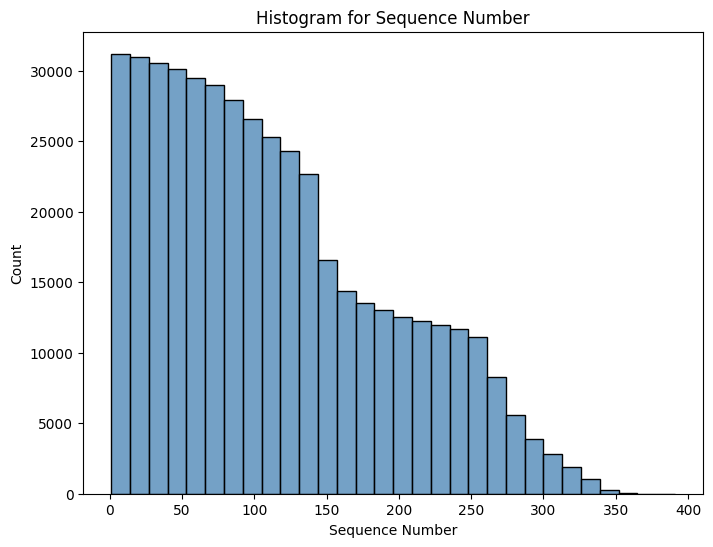

In [9]:
QSSEQ = qs['QSSEQ'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSSEQ, kde=False, color='steelblue', bins=30)
plt.xlabel('Sequence Number')
plt.ylabel('Count')
plt.title('Histogram for Sequence Number')
plt.show()

- QSSTRESN (Numeric Finding in Standard Units)

In [20]:
# Filter rows for EDSS
filtered_rows = qs[qs['QSTEST']=='EDSS01-Expanded Disability Score']

# Group by EDSS and USUBJID, then count the number of rows for each group
outcome_measure_counts = filtered_rows.groupby(['QSTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
outcome_measure_counts

,QSTEST,USUBJID,Observation_Count
0,EDSS01-Expanded Disability Score,MSOAC/0014,4
1,EDSS01-Expanded Disability Score,MSOAC/0016,1
2,EDSS01-Expanded Disability Score,MSOAC/0019,14
3,EDSS01-Expanded Disability Score,MSOAC/0024,10
4,EDSS01-Expanded Disability Score,MSOAC/0030,5
...,...,...,...
2460,EDSS01-Expanded Disability Score,MSOAC/9986,5
2461,EDSS01-Expanded Disability Score,MSOAC/9987,16
2462,EDSS01-Expanded Disability Score,MSOAC/9995,20
2463,EDSS01-Expanded Disability Score,MSOAC/9998,14


In [22]:
outcome_measure_counts.groupby('QSTEST')['Observation_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
EDSS01-Expanded Disability Score,2465.0,10.663286,5.024798,1.0,6.0,11.0,14.0,35.0


- VISITNUM (Visit Number)

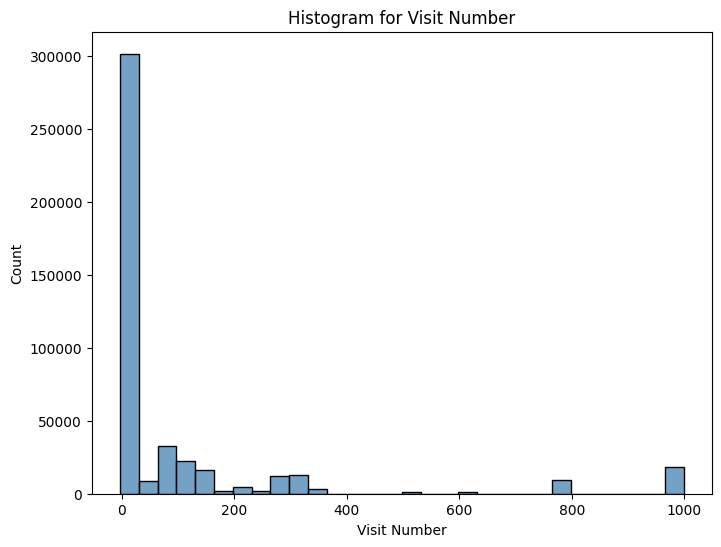

In [11]:
VISITNUM_qs = qs['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITNUM_qs, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Histogram for Visit Number')
plt.show()

- QSDY (Study Day of Collection) 

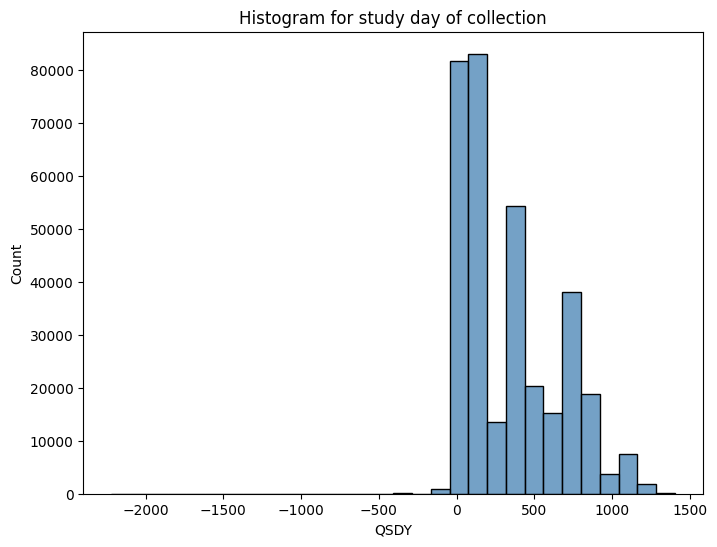

In [12]:
QSDY = qs['QSDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSDY, kde=False, color='steelblue', bins=30)
plt.xlabel('QSDY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

- Descriptive statistics for categorical variables

In [ ]:
categorical_columns = ['QSTEST', 'QSCAT', 'QSSCAT', 'QSSTRESC', 'VISIT', 'QSEVLINT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': qs[col].count(),
        'Missing Cases': qs[col].isna().sum(),
        'Unique Values': qs[col].nunique(),
        'Mode': qs[col].mode().values[0],
        'Mode Frequency': qs[col].value_counts().max()
    }

cat_qs = pd.DataFrame(descriptive_categorical).T
cat_qs

- Number of observations for each QSTEST (Question Name) category

In [14]:
QSTEST_counts = qs['QSTEST'].value_counts().reset_index()
QSTEST_counts.columns = ['QSTEST', 'Count']
QSTEST_counts

,QSTEST,Count
0,EDSS01-Expanded Disability Score,26285
1,KFSS1-Sensory Functions,26219
2,KFSS1-Brain Stem Functions,26218
3,KFSS1-Bowel and Bladder Functions,26217
4,KFSS1-Cerebral or Mental Functions,26216
...,...,...
77,SF121-Amt Time Interfere Social Activity,1491
78,SF121-Phys Health: Limit Kind of Work,1490
79,KFSS1-Other Functions Specify,575
80,KFSS1-Weakness Interferes With Testing,423


- Number of observations for each QSCAT (Category of Question) category

In [ ]:
QSCAT_counts = qs['QSCAT'].value_counts().reset_index()
QSCAT_counts.columns = ['QSCAT', 'Count']
QSCAT_counts

- Number of observations for each QSSCAT (subcategory for question) category

In [17]:
QSSCAT_counts = qs['QSSCAT'].value_counts().reset_index()
QSSCAT_counts.columns = ['QSSCAT', 'Count']
QSSCAT_counts

,QSSCAT,Count
0,PHYSICAL FUNCTIONING,48763
1,GENERAL HEALTH,24348
2,EMOTIONAL WELL-BEING,22887
3,ROLE LIMITATIONS DUE TO PHYSICAL HEALTH,18305
4,ENERGY/FATIGUE,18304
5,ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS,13718
6,SOCIAL FUNCTIONING,10630
7,PAIN,9149
8,HEALTH CHANGE,4581
9,ROLE EMOTIONAL,2984


In [ ]:
plt.figure(figsize=(12, 6))
ax = qs['QSSCAT'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('QSSCAT')
plt.ylabel('Count')
plt.title('Bar Chart for Questionnaire Subcategory')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

- Number of observations for each QSSTRESC (Character Result/Finding in Std Format) category

- Number of observations for each VISIT (Visit Name) category 

In [ ]:
VISIT_counts = qs['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

- Number of observations for each QSEVLINT (Evaluation Interval) category 

In [16]:
QSEVLINT_counts = qs['QSEVLINT'].value_counts().reset_index()
QSEVLINT_counts.columns = ['QSEVLINT', 'Count']
QSEVLINT_counts

,QSEVLINT,Count
0,-P4W,104924
1,-P2W,49403


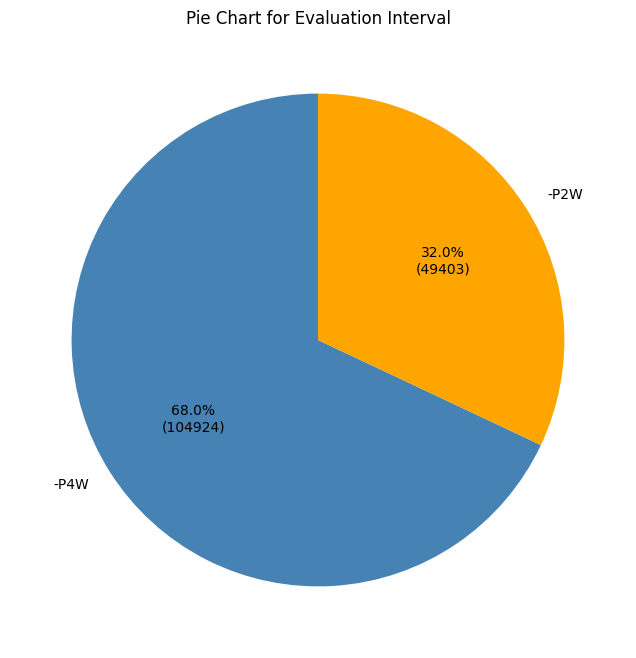

In [15]:
QSEVLINT_counts = qs['QSEVLINT'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(QSEVLINT_counts, labels=QSEVLINT_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(QSEVLINT_counts) / 100), startangle=90, colors=['steelblue', 'orange', 'green', 'red', 'purple'])
plt.title('Pie Chart for Evaluation Interval')
plt.show()

In [ ]:
alleen BDI total score is numeriek, fix mistakes (bv EDSS, inspect all graphs)